# Introduction

This notebook backtests 100 stock tickers. After reading in the stock tickers from a CSV file, it calls `backtester()` to do all the hard work. This is basically a wrapper for the `backtester()`. The `backtester()` is stored in backtest.py.

In [1]:
from backtest import get_hist, smooth, features, stringify, print_ticker_heading, balanced_scorecard, \
                     determine_minima_n_maxima, align_minima_n_maxima, plot_trades, split_data, \
                     get_signals, merge_buy_n_sell_signals, extract_trades, get_possible_trades, \
                     backtester
import pandas as pd
import numpy as np

from   frankie     import DayForecast, optimize, baseline, cross_val_tpr
import yfinance as yf

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score, roc_auc_score
from sklearn.datasets import load_breast_cancer, load_iris, make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression
from category_encoders import WOEEncoder

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, FunctionTransformer
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.signal import savgol_filter, argrelmin, argrelmax

import gc; gc.enable()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
# suppress output of plotting all the trades as this is quite a lot...
# plot_trades(tickers, min_indices, max_indices)

In [4]:
DATAPATH = '/Users/frkornet/Flatiron/Stock-Market-Final-Project/data/'
sdf = pd.read_csv(f'{DATAPATH}stocks_100.csv')
idx = (sdf.TICKER > '')
sdf = sdf.loc[idx].reset_index()
tickers = sdf.TICKER.to_list()

In [5]:
%time myPnL_df, my_Capital_df, possible_trades_df = backtester(tickers, "10y")

Simulating 93 stocks



local minima and maxima: 100%|██████████| 93/93 [00:47<00:00,  1.94it/s]


Unable to determine minima and maxima for the following tickers:
['SPTN']
Simulating with remaining 92 stocks



possible trades: 100%|██████████| 92/92 [02:04<00:00,  1.35s/it]


Possible trades to simulate: 919
before day_close: 2017-02-03 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-02-03 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-02-06 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-02-06 00:00:00 0 10000 0 10000 0 True
before day_close: 2017-02-07 00:00:00 0 10000 0 10000 0 True
after day_close: 2017-02-07 00:00:00 0 10000 0 10000 0 True
*** buying 2000.0 in ORIT on 2017-02-08 00:00:00 with target sell date of 2017-10-12 00:00:00
enough money (10000) to buy ORIT (capital=10000
invested in: [] (0)
after buy: invested in ['ORIT'] (1
capital=10000 in_use=2000.0 free=8000.0
before day_close: 2017-02-08 00:00:00 1 10000 2000.0 8000.0 0.0 True
after day_close: 2017-02-08 00:00:00 1 10000.0 2000.0 8000.0 0.0 True
before day_close: 2017-02-09 00:00:00 1 10000.0 2000.0 8000.0 0.0 True
after day_close: 2017-02-09 00:00:00 1 10007.062146892655 2007.0621468926556 8000.0 9.094947017729282e-13 True
before day_close: 2017-02-10 00:00:00 1 10007.

after buy: invested in ['ORIT', 'CPB', 'GRIF', 'FEIM', 'TOWN'] (5
capital=9923.72881355932 in_use=9873.72881355932 free=50.000000000000455
*** buying 1984.7457627118642 in DLX on 2017-03-23 00:00:00 with target sell date of 2017-03-31 00:00:00
*** selling TOWN on 2017-03-23 00:00:00 to free up money for DLX
profit of selling TOWN on 2017-03-23 00:00:00:  2.2737367544323206e-13 0.0%
enough money (2034.745762711865) to buy DLX (capital=9923.72881355932
invested in: ['ORIT', 'CPB', 'GRIF', 'FEIM'] (4)
after buy: invested in ['ORIT', 'CPB', 'GRIF', 'FEIM', 'DLX'] (5
capital=9923.72881355932 in_use=9873.72881355932 free=50.00000000000068
before day_close: 2017-03-23 00:00:00 5 9923.72881355932 9873.72881355932 50.00000000000068 6.821210263296962e-13 True
after day_close: 2017-03-23 00:00:00 5 9937.024425788753 9887.024425788753 50.00000000000068 6.821210263296962e-13 True
*** buying 1987.4048851577506 in SYX on 2017-03-24 00:00:00 with target sell date of 2017-04-07 00:00:00
*** selling DLX

after buy: invested in ['ORIT', 'SYX', 'CVI', 'CRL', 'OPCH'] (5
capital=11245.962126006329 in_use=11245.962126006329 free=0.0
*** buying 2249.192425201266 in HWC on 2017-04-04 00:00:00 with target sell date of 2017-05-04 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'SYX', 'CVI', 'CRL', 'OPCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'SYX', 'CVI', 'CRL', 'OPCH'] (5)
capital=11245.962126006329 in_use=11245.962126006329 free=0.0
before day_close: 2017-04-04 00:00:00 5 11245.962126006329 11245.962126006329 0.0 0.0 True
after day_close: 2017-04-04 00:00:00 5 11164.306461154547 11164.306461154547 0.0 0.0 True
*** buying 2232.8612922309094 in PGR on 2017-04-05 00:00:00 with target sell date of 2017-05-11 00:00:00
maxed out: PGR is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'SYX', 'CVI', 'CRL', 'OPCH'] (5)

not enough money to buy 25% of stock; not bu

after buy: invested in ['ORIT', 'CVI', 'CRL', 'OPCH', 'TRNS'] (5
capital=11008.280911740545 in_use=9765.411908242397 free=1242.869003498145
before day_close: 2017-04-17 00:00:00 5 11008.280911740545 9765.411908242397 1242.869003498145 3.183231456205249e-12 True
after day_close: 2017-04-17 00:00:00 5 11090.95651212193 9848.087508623781 1242.869003498145 3.183231456205249e-12 True
*** buying 2218.191302424386 in AA on 2017-04-18 00:00:00 with target sell date of 2017-05-17 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'CVI', 'CRL', 'OPCH', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'CVI', 'CRL', 'OPCH', 'TRNS'] (5)
capital=11090.95651212193 in_use=9848.087508623781 free=1242.869003498145
before day_close: 2017-04-18 00:00:00 5 11090.95651212193 9848.087508623781 1242.869003498145 3.183231456205249e-12 True
after day_close: 2017-04-18 00:00:00 5 11035.449590504977 9792.580587006829 12

after buy: invested in ['ORIT', 'CRL', 'OPCH', 'TRNS', 'PEBK'] (5
capital=11758.010876962046 in_use=10560.115549501645 free=1197.8953274603969
before day_close: 2017-05-01 00:00:00 5 11758.010876962046 10560.115549501645 1197.8953274603969 4.092726157978177e-12 True
after day_close: 2017-05-01 00:00:00 5 11659.045520498203 10461.150193037802 1197.8953274603969 4.092726157978177e-12 True
before day_close: 2017-05-02 00:00:00 5 11659.045520498203 10461.150193037802 1197.8953274603969 4.092726157978177e-12 True
after day_close: 2017-05-02 00:00:00 5 11688.251623839182 10490.35629637878 1197.8953274603969 4.092726157978177e-12 True
before day_close: 2017-05-03 00:00:00 5 11688.251623839182 10490.35629637878 1197.8953274603969 4.092726157978177e-12 True
after day_close: 2017-05-03 00:00:00 5 11844.997718036706 10647.102390576305 1197.8953274603969 4.092726157978177e-12 True
before day_close: 2017-05-04 00:00:00 5 11844.997718036706 10647.102390576305 1197.8953274603969 4.092726157978177e-12

after buy: invested in ['ORIT', 'CRL', 'TRNS', 'OTEX', 'VSH'] (5
capital=12047.569101432604 in_use=11082.10010650641 free=965.4689949261842
*** buying 2409.513820286521 in AA on 2017-05-23 00:00:00 with target sell date of 2017-05-25 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'CRL', 'TRNS', 'OTEX', 'VSH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'CRL', 'TRNS', 'OTEX', 'VSH'] (5)
capital=12047.569101432604 in_use=11082.10010650641 free=965.4689949261842
*** buying 2409.513820286521 in EPM on 2017-05-23 00:00:00 with target sell date of 2017-06-23 00:00:00
maxed out: EPM is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'CRL', 'TRNS', 'OTEX', 'VSH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'CRL', 'TRNS', 'OTEX', 'VSH'] (5)
capital=12047.569101432604 in_use=11082.10010650641 free=965.4689949261842
before day_close: 

after day_close: 2017-06-13 00:00:00 5 12348.86491181244 11362.227927817143 986.6369839952899 6.821210263296962e-12 True
before day_close: 2017-06-14 00:00:00 5 12348.86491181244 11362.227927817143 986.6369839952899 6.821210263296962e-12 True
after day_close: 2017-06-14 00:00:00 5 12146.876761002502 11160.239777007206 986.6369839952899 6.821210263296962e-12 True
*** buying 2429.3753522005004 in TGA on 2017-06-15 00:00:00 with target sell date of 2017-08-24 00:00:00
maxed out: TGA is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'CRL', 'TRNS', 'OTEX', 'CVI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'CRL', 'TRNS', 'OTEX', 'CVI'] (5)
capital=12146.876761002502 in_use=11160.239777007206 free=986.6369839952899
*** buying 2429.3753522005004 in BB on 2017-06-15 00:00:00 with target sell date of 2017-06-26 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'CRL'

after day_close: 2017-06-28 00:00:00 5 12397.364910879596 11312.35968836564 1085.0052225139493 7.73070496506989e-12 True
*** buying 2479.4729821759192 in CPB on 2017-06-29 00:00:00 with target sell date of 2017-08-03 00:00:00
maxed out: CPB is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'CRL', 'TRNS', 'OTEX', 'AMWD'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'CRL', 'TRNS', 'OTEX', 'AMWD'] (5)
capital=12397.364910879596 in_use=11312.35968836564 free=1085.0052225139493
before day_close: 2017-06-29 00:00:00 5 12397.364910879596 11312.35968836564 1085.0052225139493 7.73070496506989e-12 True
after day_close: 2017-06-29 00:00:00 5 12343.44767182829 11258.442449314332 1085.0052225139493 7.73070496506989e-12 True
before day_close: 2017-06-30 00:00:00 5 12343.44767182829 11258.442449314332 1085.0052225139493 7.73070496506989e-12 True
after day_close: 2017-06-30 00:00:00 5 12417.611049494135 11332.605826980178 1085.005222

after buy: invested in ['ORIT', 'TRNS', 'OTEX', 'SYX', 'CRL'] (5
capital=12757.441979022895 in_use=11893.320920749024 free=864.1210582738663
*** buying 2551.488395804579 in EPM on 2017-07-26 00:00:00 with target sell date of 2017-07-28 00:00:00
maxed out: EPM is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'TRNS', 'OTEX', 'SYX', 'CRL'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'TRNS', 'OTEX', 'SYX', 'CRL'] (5)
capital=12757.441979022895 in_use=11893.320920749024 free=864.1210582738663
before day_close: 2017-07-26 00:00:00 5 12757.441979022895 11893.320920749024 864.1210582738663 5.002220859751105e-12 True
after day_close: 2017-07-26 00:00:00 5 12847.970979652562 11983.84992137869 864.1210582738663 5.002220859751105e-12 True
*** buying 2569.5941959305123 in CVI on 2017-07-27 00:00:00 with target sell date of 2017-08-25 00:00:00
*** selling CRL on 2017-07-27 00:00:00 to free up money for CVI
profit of selling CRL o

after buy: invested in ['ORIT', 'SYX', 'CVI', 'VIVO', 'FCFS'] (5
capital=13093.978829482656 in_use=12734.229254868394 free=359.7495746142572
*** buying 2618.795765896531 in TXRH on 2017-08-10 00:00:00 with target sell date of 2017-09-29 00:00:00
maxed out: TXRH is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'SYX', 'CVI', 'VIVO', 'FCFS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'SYX', 'CVI', 'VIVO', 'FCFS'] (5)
capital=13093.978829482656 in_use=12734.229254868394 free=359.7495746142572
*** buying 2618.795765896531 in DRI on 2017-08-10 00:00:00 with target sell date of 2017-09-22 00:00:00
*** selling VIVO on 2017-08-10 00:00:00 to free up money for DRI
profit of selling VIVO on 2017-08-10 00:00:00:  -49.72900532512085 -1.84%
enough money (3016.1072757311217) to buy DRI (capital=13064.970243043002
invested in: ['ORIT', 'SYX', 'CVI', 'FCFS'] (4)
after buy: invested in ['ORIT', 'SYX', 'CVI', 'FCFS', 'DRI'] (5
capita

after day_close: 2017-08-23 00:00:00 5 13312.484870603292 12870.730713026782 441.7541575765067 3.183231456205249e-12 True
*** buying 2662.4969741206583 in REGN on 2017-08-24 00:00:00 with target sell date of 2018-06-20 00:00:00
maxed out: REGN is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'SYX', 'CVI', 'VSH', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'SYX', 'CVI', 'VSH', 'TRNS'] (5)
capital=13312.484870603292 in_use=12870.730713026782 free=441.7541575765067
before day_close: 2017-08-24 00:00:00 5 13312.484870603292 12870.730713026782 441.7541575765067 3.183231456205249e-12 True
after day_close: 2017-08-24 00:00:00 5 13328.761663109113 12887.007505532603 441.7541575765067 3.183231456205249e-12 True
invested in: ['ORIT', 'SYX', 'CVI', 'VSH', 'TRNS'] (5)
capital=13328.761663109113 in_use=12887.007505532603 free=441.7541575765067
*** selling CVI on 2017-08-25 00:00:00
profit of selling CVI on 2017-08-25 00:

after buy: invested in ['ORIT', 'TRNS', 'PGR', 'VZ', 'VSH'] (5
capital=13482.973445366377 in_use=13106.940086213219 free=376.03335915315347
before day_close: 2017-09-19 00:00:00 5 13482.973445366377 13106.940086213219 376.03335915315347 4.547473508864641e-12 True
after day_close: 2017-09-19 00:00:00 5 13656.845511885345 13280.812152732185 376.03335915315347 6.366462912410498e-12 True
before day_close: 2017-09-20 00:00:00 5 13656.845511885345 13280.812152732185 376.03335915315347 6.366462912410498e-12 True
after day_close: 2017-09-20 00:00:00 5 13628.28360257869 13252.25024342553 376.03335915315347 6.366462912410498e-12 True
before day_close: 2017-09-21 00:00:00 5 13628.28360257869 13252.25024342553 376.03335915315347 6.366462912410498e-12 True
after day_close: 2017-09-21 00:00:00 5 13573.550575348185 13197.517216195025 376.03335915315347 6.366462912410498e-12 True
before day_close: 2017-09-22 00:00:00 5 13573.550575348185 13197.517216195025 376.03335915315347 6.366462912410498e-12 True

after buy: invested in ['ORIT', 'AMT', 'DSGX', 'BLDR'] (4
capital=14543.165523763219 in_use=10652.157601743296 free=3891.007922019913
before day_close: 2017-10-11 00:00:00 4 14543.165523763219 10652.157601743296 3891.007922019913 9.094947017729282e-12 True
after day_close: 2017-10-11 00:00:00 4 14540.051432658915 10649.043510638992 3891.007922019913 9.094947017729282e-12 True
invested in: ['ORIT', 'AMT', 'DSGX', 'BLDR'] (4)
capital=14540.051432658915 in_use=10649.043510638992 free=3891.007922019913
*** selling ORIT on 2017-10-12 00:00:00
profit of selling ORIT on 2017-10-12 00:00:00:  55.08474576271192 2.75%
after selling invested in: ['AMT', 'DSGX', 'BLDR'] (3)
capital=14534.40171514479 in_use=8588.309047362156 free=5946.092667782625
invested in: ['AMT', 'DSGX', 'BLDR'] (3)
capital=14534.40171514479 in_use=8588.309047362156 free=5946.092667782625
*** selling DSGX on 2017-10-12 00:00:00
profit of selling DSGX on 2017-10-12 00:00:00:  130.93432821762326 4.75%
after selling invested in: 

after day_close: 2017-10-26 00:00:00 5 14332.763314653732 14332.763314653723 0.0 9.094947017729282e-12 True
*** buying 2866.5526629307465 in GRIF on 2017-10-27 00:00:00 with target sell date of 2017-10-31 00:00:00
*** selling JVA on 2017-10-27 00:00:00 to free up money for GRIF
profit of selling JVA on 2017-10-27 00:00:00:  -18.829433893463374 -0.69%
enough money (2723.9914365876607) to buy GRIF (capital=14313.933880760269
invested in: ['DRI', 'AMT', 'TRIP', 'MDP'] (4)
you do not have 2723.9914365876607 and setting amount to 2723.9914365876607
after buy: invested in ['DRI', 'AMT', 'TRIP', 'MDP', 'GRIF'] (5
capital=14313.933880760269 in_use=14313.93388076026 free=0.0
before day_close: 2017-10-27 00:00:00 5 14313.933880760269 14313.93388076026 0.0 9.094947017729282e-12 True
after day_close: 2017-10-27 00:00:00 5 14243.544652363591 14243.54465236358 0.0 1.0913936421275139e-11 True
*** buying 2848.7089304727183 in GRPN on 2017-10-30 00:00:00 with target sell date of 2017-11-13 00:00:00
***

breached stop-loss and selling TRIP...
profit of selling TRIP on 2017-11-07 00:00:00:  -607.6999676017472 -21.15%
after day_close: 2017-11-07 00:00:00 4 13537.2209693599 11271.775924391497 2265.445044968392 1.0913936421275139e-11 True
invested in: ['AMT', 'TRNS', 'PGR', 'BXP'] (4)
capital=13537.2209693599 in_use=11271.775924391497 free=2265.445044968392
*** selling BXP on 2017-11-08 00:00:00
profit of selling BXP on 2017-11-08 00:00:00:  24.50668075845124 1.06%
after selling invested in: ['AMT', 'TRNS', 'PGR'] (3)
capital=13547.581517322822 in_use=8952.208628538758 free=4595.372888784053
*** buying 2709.5163034645643 in TOWN on 2017-11-08 00:00:00 with target sell date of 2018-03-08 00:00:00
enough money (4595.372888784053) to buy TOWN (capital=13547.581517322822
invested in: ['AMT', 'TRNS', 'PGR'] (3)
after buy: invested in ['AMT', 'TRNS', 'PGR', 'TOWN'] (4
capital=13547.581517322822 in_use=11661.724932003322 free=1885.856585319489
before day_close: 2017-11-08 00:00:00 4 13547.5815173

after buy: invested in ['TRNS', 'ORIT', 'VZ', 'VSH', 'FHB'] (5
capital=13652.732136147502 in_use=13180.403961821357 free=472.3281743261341
before day_close: 2017-11-17 00:00:00 5 13652.732136147502 13180.403961821357 472.3281743261341 1.0913936421275139e-11 True
after day_close: 2017-11-17 00:00:00 5 13863.022861302828 13390.694686976683 472.3281743261341 1.0913936421275139e-11 True
*** buying 2772.604572260566 in PCAR on 2017-11-20 00:00:00 with target sell date of 2017-12-08 00:00:00
maxed out: PCAR is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'ORIT', 'VZ', 'VSH', 'FHB'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'ORIT', 'VZ', 'VSH', 'FHB'] (5)
capital=13863.022861302828 in_use=13390.694686976683 free=472.3281743261341
*** buying 2772.604572260566 in TXRH on 2017-11-20 00:00:00 with target sell date of 2017-11-30 00:00:00
maxed out: TXRH is not expected to perform better than stocks already invested in
invest

after day_close: 2017-12-07 00:00:00 5 13870.194147692222 13756.111951443741 114.08219624846879 1.1823431123048067e-11 True
*** buying 2774.0388295384446 in BB on 2017-12-08 00:00:00 with target sell date of 2017-12-21 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'VSH', 'CRL', 'MRC', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'VSH', 'CRL', 'MRC', 'DSGX'] (5)
capital=13870.194147692222 in_use=13756.111951443741 free=114.08219624846879
*** buying 2774.0388295384446 in BOCH on 2017-12-08 00:00:00 with target sell date of 2017-12-12 00:00:00
maxed out: BOCH is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'VSH', 'CRL', 'MRC', 'DSGX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'VSH', 'CRL', 'MRC', 'DSGX'] (5)
capital=13870.194147692222 in_use=13756.111951443741 free=114.08219624846879
before day_close: 2017-12-08 0

after buy: invested in ['ORIT', 'AMT', 'MBI', 'PANW', 'IPG'] (5
capital=13894.736165044189 in_use=13725.277739063005 free=169.45842598117315
before day_close: 2018-01-02 00:00:00 5 13894.736165044189 13725.277739063005 169.45842598117315 1.0459189070388675e-11 True
after day_close: 2018-01-02 00:00:00 5 14010.110134295703 13840.65170831452 169.45842598117315 8.640199666842818e-12 True
*** buying 2802.0220268591406 in BOCH on 2018-01-03 00:00:00 with target sell date of 2018-03-23 00:00:00
*** selling IPG on 2018-01-03 00:00:00 to free up money for BOCH
profit of selling IPG on 2018-01-03 00:00:00:  -66.87306175689719 -2.41%
enough money (2881.532597233114) to buy BOCH (capital=13943.237072538806
invested in: ['ORIT', 'AMT', 'MBI', 'PANW'] (4)
after buy: invested in ['ORIT', 'AMT', 'MBI', 'PANW', 'BOCH'] (5
capital=13943.237072538806 in_use=13863.726502164824 free=79.51057037397322
before day_close: 2018-01-03 00:00:00 5 13943.237072538806 13863.726502164824 79.51057037397322 9.54969436

after buy: invested in ['ORIT', 'AMT', 'PANW', 'CRL', 'PGR'] (5
capital=14159.400868827946 in_use=14074.859263947426 free=84.54160488051093
before day_close: 2018-01-24 00:00:00 5 14159.400868827946 14074.859263947426 84.54160488051093 9.094947017729282e-12 True
after day_close: 2018-01-24 00:00:00 5 14100.286461057309 14015.744856176789 84.54160488051093 9.094947017729282e-12 True
before day_close: 2018-01-25 00:00:00 5 14100.286461057309 14015.744856176789 84.54160488051093 9.094947017729282e-12 True
after day_close: 2018-01-25 00:00:00 5 14182.436280014123 14097.894675133603 84.54160488051093 9.094947017729282e-12 True
*** buying 2836.4872560028243 in SLG on 2018-01-26 00:00:00 with target sell date of 2018-03-16 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'AMT', 'PANW', 'CRL', 'PGR'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'AMT', 'PANW', 'CRL', 'PGR'] (5)
capital=14182.4362800141

after buy: invested in ['ORIT', 'PANW', 'CRL', 'CVI', 'OPCH'] (5
capital=13810.651432121518 in_use=13810.651432121507 free=0.0
*** buying 2762.1302864243034 in GS on 2018-02-05 00:00:00 with target sell date of 2018-02-16 00:00:00
maxed out: GS is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'PANW', 'CRL', 'CVI', 'OPCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'PANW', 'CRL', 'CVI', 'OPCH'] (5)
capital=13810.651432121518 in_use=13810.651432121507 free=0.0
*** buying 2762.1302864243034 in DLX on 2018-02-05 00:00:00 with target sell date of 2018-03-20 00:00:00
maxed out: DLX is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'PANW', 'CRL', 'CVI', 'OPCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'PANW', 'CRL', 'CVI', 'OPCH'] (5)
capital=13810.651432121518 in_use=13810.651432121507 free=0.0
*** buying 2762.1302864243034 in AA on 2018-02-05 00:00

after day_close: 2018-02-21 00:00:00 5 14279.468863598111 14218.934503520293 60.53436007780647 1.1368683772161603e-11 True
before day_close: 2018-02-22 00:00:00 5 14279.468863598111 14218.934503520293 60.53436007780647 1.1368683772161603e-11 True
breached stop-loss and selling CVI...
profit of selling CVI on 2018-02-22 00:00:00:  -312.3412067582108 -11.08%
after day_close: 2018-02-22 00:00:00 4 14218.518906426896 11651.130410026675 2567.388496400209 1.1823431123048067e-11 True
*** buying 2843.703781285379 in AMWD on 2018-02-23 00:00:00 with target sell date of 2018-05-18 00:00:00
enough money (2567.388496400209) to buy AMWD (capital=14218.518906426896
invested in: ['ORIT', 'PANW', 'OPCH', 'SYX'] (4)
you do not have 2567.388496400209 and setting amount to 2567.388496400209
after buy: invested in ['ORIT', 'PANW', 'OPCH', 'SYX', 'AMWD'] (5
capital=14218.518906426896 in_use=14218.518906426885 free=0.0
before day_close: 2018-02-23 00:00:00 5 14218.518906426896 14218.518906426885 0.0 1.09139

profit of selling VSH on 2018-03-08 00:00:00:  6.299544569551017 0.22%
enough money (3162.6538441500124) to buy OPCH (capital=14648.023636344196
invested in: ['ORIT', 'SYX', 'ORC', 'TRNS'] (4)
after buy: invested in ['ORIT', 'SYX', 'ORC', 'TRNS', 'OPCH'] (5
capital=14648.023636344196 in_use=14413.714610549097 free=234.30902579508347
before day_close: 2018-03-08 00:00:00 5 14648.023636344196 14413.714610549097 234.30902579508347 1.546140993013978e-11 True
after day_close: 2018-03-08 00:00:00 5 14612.68548636563 14378.376460570531 234.30902579508347 1.546140993013978e-11 True
*** buying 2922.537097273126 in TXRH on 2018-03-09 00:00:00 with target sell date of 2018-03-28 00:00:00
maxed out: TXRH is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'SYX', 'ORC', 'TRNS', 'OPCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'SYX', 'ORC', 'TRNS', 'OPCH'] (5)
capital=14612.68548636563 in_use=14378.376460570531 free=234.309025795

breached stop-loss and selling OPCH...
profit of selling OPCH on 2018-04-02 00:00:00:  -326.62307589343436 -11.15%
after day_close: 2018-04-02 00:00:00 4 14439.885232936915 11633.36754547164 2806.5176874652598 1.546140993013978e-11 True
before day_close: 2018-04-03 00:00:00 4 14439.885232936915 11633.36754547164 2806.5176874652598 1.546140993013978e-11 True
after day_close: 2018-04-03 00:00:00 4 14547.239415326116 11740.72172786084 2806.5176874652598 1.546140993013978e-11 True
*** buying 2909.4478830652233 in TOWN on 2018-04-04 00:00:00 with target sell date of 2018-04-26 00:00:00
enough money (2806.5176874652598) to buy TOWN (capital=14547.239415326116
invested in: ['ORIT', 'ORC', 'TRNS', 'OTEX'] (4)
you do not have 2806.5176874652598 and setting amount to 2806.5176874652598
after buy: invested in ['ORIT', 'ORC', 'TRNS', 'OTEX', 'TOWN'] (5
capital=14547.239415326116 in_use=14547.239415326101 free=0.0
*** buying 2909.4478830652233 in FHB on 2018-04-04 00:00:00 with target sell date of 

after day_close: 2018-04-24 00:00:00 3 14943.940148441821 8764.523567388793 6179.416581053018 1.0913936421275139e-11 True
before day_close: 2018-04-25 00:00:00 3 14943.940148441821 8764.523567388793 6179.416581053018 1.0913936421275139e-11 True
after day_close: 2018-04-25 00:00:00 3 14943.867372599268 8764.45079154624 6179.416581053018 1.0913936421275139e-11 True
*** buying 2988.7734745198536 in ORIT on 2018-04-26 00:00:00 with target sell date of 2018-06-18 00:00:00
enough money (6179.416581053018) to buy ORIT (capital=14943.867372599268
invested in: ['OTEX', 'SYX', 'AMT'] (3)
after buy: invested in ['OTEX', 'SYX', 'AMT', 'ORIT'] (4
capital=14943.867372599268 in_use=11753.224266066094 free=3190.643106533164
*** buying 2988.7734745198536 in MBI on 2018-04-26 00:00:00 with target sell date of 2018-05-21 00:00:00
enough money (3190.643106533164) to buy MBI (capital=14943.867372599268
invested in: ['OTEX', 'SYX', 'AMT', 'ORIT'] (4)
after buy: invested in ['OTEX', 'SYX', 'AMT', 'ORIT', 'MB

after buy: invested in ['OTEX', 'AMT', 'ORIT', 'VSH', 'PCAR'] (5
capital=15346.735023133117 in_use=15346.735023133104 free=0.0
before day_close: 2018-05-15 00:00:00 5 15346.735023133117 15346.735023133104 0.0 1.2732925824820995e-11 True
after day_close: 2018-05-15 00:00:00 5 15365.091321909485 15365.091321909475 0.0 1.0913936421275139e-11 True
before day_close: 2018-05-16 00:00:00 5 15365.091321909485 15365.091321909475 0.0 1.0913936421275139e-11 True
after day_close: 2018-05-16 00:00:00 5 15353.910893746332 15353.91089374632 0.0 1.0913936421275139e-11 True
*** buying 3070.782178749266 in IQV on 2018-05-17 00:00:00 with target sell date of 2018-06-07 00:00:00
*** selling PCAR on 2018-05-17 00:00:00 to free up money for IQV
profit of selling PCAR on 2018-05-17 00:00:00:  36.414632067158436 1.21%
enough money (3041.6621956668046) to buy IQV (capital=15371.59800075038
invested in: ['OTEX', 'AMT', 'ORIT', 'VSH'] (4)
you do not have 3041.6621956668046 and setting amount to 3041.662195666804

after buy: invested in ['OTEX', 'ORIT', 'TRNS', 'OPCH', 'DSGX'] (5
capital=16233.104002741533 in_use=16169.130008714925 free=63.97399402659539
before day_close: 2018-06-07 00:00:00 5 16233.104002741533 16169.130008714925 63.97399402659539 1.2732925824820995e-11 True
after day_close: 2018-06-07 00:00:00 5 16380.570014250548 16316.59602022394 63.97399402659539 1.2732925824820995e-11 True
before day_close: 2018-06-08 00:00:00 5 16380.570014250548 16316.59602022394 63.97399402659539 1.2732925824820995e-11 True
after day_close: 2018-06-08 00:00:00 5 16495.48579521635 16431.511801189743 63.97399402659539 1.2732925824820995e-11 True
before day_close: 2018-06-11 00:00:00 5 16495.48579521635 16431.511801189743 63.97399402659539 1.2732925824820995e-11 True
after day_close: 2018-06-11 00:00:00 5 16577.263477935554 16513.289483908946 63.97399402659539 1.2732925824820995e-11 True
before day_close: 2018-06-12 00:00:00 5 16577.263477935554 16513.289483908946 63.97399402659539 1.2732925824820995e-11 T

enough money (3758.915094758052) to buy CRL (capital=16405.261602306073
invested in: ['OTEX', 'CVI', 'SPPI', 'IQV'] (4)
after buy: invested in ['OTEX', 'CVI', 'SPPI', 'IQV', 'CRL'] (5
capital=16405.261602306073 in_use=15931.550325095577 free=473.71127721047924
before day_close: 2018-06-26 00:00:00 5 16405.261602306073 15931.550325095577 473.71127721047924 1.6370904631912708e-11 True
after day_close: 2018-06-26 00:00:00 5 16893.596028092637 16419.88475088214 473.71127721047924 1.6370904631912708e-11 True
invested in: ['OTEX', 'CVI', 'SPPI', 'IQV', 'CRL'] (5)
capital=16893.596028092637 in_use=16419.88475088214 free=473.71127721047924
*** selling SPPI on 2018-06-27 00:00:00
profit of selling SPPI on 2018-06-27 00:00:00:  213.75656847105347 6.36%
after selling invested in: ['OTEX', 'CVI', 'IQV', 'CRL'] (4)
capital=16748.24156153232 in_use=12700.520459485808 free=4047.721102046496
*** buying 3349.6483123064636 in HLT on 2018-06-27 00:00:00 with target sell date of 2018-09-28 00:00:00
enough

after buy: invested in ['CVI', 'IQV', 'AGRX', 'BMCH', 'TOWN'] (5
capital=17215.2725813399 in_use=16807.744344617775 free=407.5282367220998
*** buying 3443.05451626798 in VIVO on 2018-07-17 00:00:00 with target sell date of 2018-07-25 00:00:00
*** selling TOWN on 2018-07-17 00:00:00 to free up money for VIVO
profit of selling TOWN on 2018-07-17 00:00:00:  0.0 0.0%
enough money (3850.58275299008) to buy VIVO (capital=17215.2725813399
invested in: ['CVI', 'IQV', 'AGRX', 'BMCH'] (4)
after buy: invested in ['CVI', 'IQV', 'AGRX', 'BMCH', 'VIVO'] (5
capital=17215.2725813399 in_use=16807.744344617775 free=407.5282367220998
before day_close: 2018-07-17 00:00:00 5 17215.2725813399 16807.744344617775 407.5282367220998 2.637534635141492e-11 True
after day_close: 2018-07-17 00:00:00 5 17185.985793190826 16778.4575564687 407.5282367220998 2.637534635141492e-11 True
*** buying 3437.197158638165 in CVX on 2018-07-18 00:00:00 with target sell date of 2018-08-02 00:00:00
*** selling VIVO on 2018-07-18 0

after buy: invested in ['CVI', 'IQV', 'BMCH', 'AMT', 'PANW'] (5
capital=17960.810475757047 in_use=17946.491368063027 free=14.319107693997012
before day_close: 2018-08-02 00:00:00 5 17960.810475757047 17946.491368063027 14.319107693997012 2.319211489520967e-11 True
after day_close: 2018-08-02 00:00:00 5 17875.246192330393 17860.927084636372 14.319107693997012 2.319211489520967e-11 True
*** buying 3575.0492384660784 in DRQ on 2018-08-03 00:00:00 with target sell date of 2018-08-28 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['CVI', 'IQV', 'BMCH', 'AMT', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['CVI', 'IQV', 'BMCH', 'AMT', 'PANW'] (5)
capital=17875.246192330393 in_use=17860.927084636372 free=14.319107693997012
before day_close: 2018-08-03 00:00:00 5 17875.246192330393 17860.927084636372 14.319107693997012 2.319211489520967e-11 True
after day_close: 2018-08-03 00:00:00 5 17853.668825514 17839.3497

after day_close: 2018-08-20 00:00:00 5 18112.61373390758 18112.613733907558 0.0 2.1827872842550278e-11 True
before day_close: 2018-08-21 00:00:00 5 18112.61373390758 18112.613733907558 0.0 2.1827872842550278e-11 True
after day_close: 2018-08-21 00:00:00 5 18108.358709277487 18108.358709277465 0.0 2.1827872842550278e-11 True
*** buying 3621.671741855497 in CVX on 2018-08-22 00:00:00 with target sell date of 2018-10-03 00:00:00
*** selling DRI on 2018-08-22 00:00:00 to free up money for CVX
profit of selling DRI on 2018-08-22 00:00:00:  140.06209841539066 4.06%
enough money (3591.5217612492293) to buy CVX (capital=18100.778878069126
invested in: ['AMT', 'PANW', 'OPCH', 'PEBK'] (4)
you do not have 3591.5217612492293 and setting amount to 3591.5217612492293
after buy: invested in ['AMT', 'PANW', 'OPCH', 'PEBK', 'CVX'] (5
capital=18100.778878069126 in_use=18100.778878069104 free=0.0
*** buying 3620.1557756138254 in TXRH on 2018-08-22 00:00:00 with target sell date of 2018-09-27 00:00:00
max

after buy: invested in ['AMT', 'PANW', 'OPCH', 'TRNS', 'FEIM'] (5
capital=18174.771616360533 in_use=18126.03262465907 free=48.73899170144023
before day_close: 2018-09-07 00:00:00 5 18174.771616360533 18126.03262465907 48.73899170144023 2.2282620193436742e-11 True
after day_close: 2018-09-07 00:00:00 5 18244.283553982186 18195.544562280724 48.73899170144023 2.2282620193436742e-11 True
*** buying 3648.8567107964373 in AA on 2018-09-10 00:00:00 with target sell date of 2018-09-18 00:00:00
maxed out: AA is not expected to perform better than stocks already invested in
invested in: ['AMT', 'PANW', 'OPCH', 'TRNS', 'FEIM'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['AMT', 'PANW', 'OPCH', 'TRNS', 'FEIM'] (5)
capital=18244.283553982186 in_use=18195.544562280724 free=48.73899170144023
*** buying 3648.8567107964373 in SYX on 2018-09-10 00:00:00 with target sell date of 2019-01-18 00:00:00
*** selling FEIM on 2018-09-10 00:00:00 to free up money for SYX
profit of selling F

after day_close: 2018-09-26 00:00:00 5 18023.99151667019 17771.291738898442 252.69977777172744 2.0463630789890885e-11 True
*** buying 3604.798303334038 in HWC on 2018-09-27 00:00:00 with target sell date of 2019-01-22 00:00:00
maxed out: HWC is not expected to perform better than stocks already invested in
invested in: ['PANW', 'TRNS', 'SYX', 'LIND', 'ORIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'TRNS', 'SYX', 'LIND', 'ORIT'] (5)
capital=18023.99151667019 in_use=17771.291738898442 free=252.69977777172744
before day_close: 2018-09-27 00:00:00 5 18023.99151667019 17771.291738898442 252.69977777172744 2.0463630789890885e-11 True
after day_close: 2018-09-27 00:00:00 5 18020.175465301483 17767.475687529735 252.69977777172744 2.0463630789890885e-11 True
before day_close: 2018-09-28 00:00:00 5 18020.175465301483 17767.475687529735 252.69977777172744 2.0463630789890885e-11 True
after day_close: 2018-09-28 00:00:00 5 18129.38941815927 17876.68964038752 252.

after day_close: 2018-10-11 00:00:00 5 16861.75754077329 16861.757540773277 0.0 1.4551915228366852e-11 True
*** buying 3372.3515081546584 in LIND on 2018-10-12 00:00:00 with target sell date of 2019-03-25 00:00:00
*** selling PGR on 2018-10-12 00:00:00 to free up money for LIND
profit of selling PGR on 2018-10-12 00:00:00:  -4.876843004269176 -0.16%
enough money (3122.6425756338317) to buy LIND (capital=16856.880697769022
invested in: ['PANW', 'ORIT', 'OTEX', 'HLT'] (4)
you do not have 3122.6425756338317 and setting amount to 3122.6425756338317
after buy: invested in ['PANW', 'ORIT', 'OTEX', 'HLT', 'LIND'] (5
capital=16856.880697769022 in_use=16856.880697769007 free=0.0
*** buying 3371.3761395538045 in CVX on 2018-10-12 00:00:00 with target sell date of 2018-10-19 00:00:00
*** selling HLT on 2018-10-12 00:00:00 to free up money for CVX
profit of selling HLT on 2018-10-12 00:00:00:  10.556035098652501 0.3%
enough money (3502.204553866539) to buy CVX (capital=16881.351506406805
invested 

after buy: invested in ['ORIT', 'LIND', 'OPCH', 'IQV', 'DRI'] (5
capital=16143.10027602969 in_use=16143.10027602968 free=0.0
before day_close: 2018-10-31 00:00:00 5 16143.10027602969 16143.10027602968 0.0 1.0913936421275139e-11 True
after day_close: 2018-10-31 00:00:00 5 16158.826237849551 16158.82623784954 0.0 1.0913936421275139e-11 True
*** buying 3231.76524756991 in JVA on 2018-11-01 00:00:00 with target sell date of 2018-11-09 00:00:00
maxed out: JVA is not expected to perform better than stocks already invested in
invested in: ['ORIT', 'LIND', 'OPCH', 'IQV', 'DRI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['ORIT', 'LIND', 'OPCH', 'IQV', 'DRI'] (5)
capital=16158.826237849551 in_use=16158.82623784954 free=0.0
before day_close: 2018-11-01 00:00:00 5 16158.826237849551 16158.82623784954 0.0 1.0913936421275139e-11 True
after day_close: 2018-11-01 00:00:00 5 16183.824803564208 16183.824803564197 0.0 1.0913936421275139e-11 True
before day_close: 2018-11-02 00:00

after buy: invested in ['ORIT', 'LIND', 'IQV', 'CVI', 'AMT'] (5
capital=17990.36138774703 in_use=17005.89257510028 free=984.4688126467431
before day_close: 2018-11-29 00:00:00 5 17990.36138774703 17005.89257510028 984.4688126467431 8.640199666842818e-12 True
after day_close: 2018-11-29 00:00:00 5 17971.123672570873 16986.65485992412 984.4688126467431 8.640199666842818e-12 True
before day_close: 2018-11-30 00:00:00 5 17971.123672570873 16986.65485992412 984.4688126467431 8.640199666842818e-12 True
after day_close: 2018-11-30 00:00:00 5 18025.289435989325 17040.820623342574 984.4688126467431 8.640199666842818e-12 True
invested in: ['ORIT', 'LIND', 'IQV', 'CVI', 'AMT'] (5)
capital=18025.289435989325 in_use=17040.820623342574 free=984.4688126467431
*** selling AMT on 2018-12-03 00:00:00
profit of selling AMT on 2018-12-03 00:00:00:  7.87531019711696 0.22%
after selling invested in: ['ORIT', 'LIND', 'IQV', 'CVI'] (4)
capital=17994.238212926408 in_use=13424.253171963695 free=4569.98504096270

breached stop-loss and selling TRIP...
profit of selling TRIP on 2018-12-20 00:00:00:  -373.2137469771874 -10.39%
after day_close: 2018-12-20 00:00:00 3 16485.296320676265 9303.436817455682 7181.8595032205785 4.547473508864641e-12 True
before day_close: 2018-12-21 00:00:00 3 16485.296320676265 9303.436817455682 7181.8595032205785 4.547473508864641e-12 True
after day_close: 2018-12-21 00:00:00 3 16509.664410944788 9327.804907724205 7181.8595032205785 4.547473508864641e-12 True
before day_close: 2018-12-24 00:00:00 3 16509.664410944788 9327.804907724205 7181.8595032205785 4.547473508864641e-12 True
breached stop-loss and selling IQV...
profit of selling IQV on 2018-12-24 00:00:00:  -384.94623666458074 -11.86%
after day_close: 2018-12-24 00:00:00 2 16287.628192174578 6244.389137938091 10043.239054236485 1.8189894035458565e-12 True
*** buying 3257.5256384349154 in PEBK on 2018-12-26 00:00:00 with target sell date of 2019-01-18 00:00:00
enough money (10043.239054236485) to buy PEBK (capital

after buy: invested in ['ORIT', 'LIND', 'CRL', 'AMT', 'AA'] (5
capital=17400.422871192077 in_use=17073.348434205785 free=327.0744369863005
before day_close: 2019-01-17 00:00:00 5 17400.422871192077 17073.348434205785 327.0744369863005 9.094947017729282e-12 True
after day_close: 2019-01-17 00:00:00 5 17453.514185228963 17126.439748242672 327.0744369863005 9.094947017729282e-12 True
invested in: ['ORIT', 'LIND', 'CRL', 'AMT', 'AA'] (5)
capital=17453.514185228963 in_use=17126.439748242672 free=327.0744369863005
*** selling AA on 2019-01-18 00:00:00
profit of selling AA on 2019-01-18 00:00:00:  -37.63525054938509 -1.08%
after selling invested in: ['ORIT', 'LIND', 'CRL', 'AMT'] (4)
capital=17415.87893467958 in_use=13646.355174004257 free=3769.523760675331
before day_close: 2019-01-18 00:00:00 4 17415.87893467958 13646.355174004257 3769.523760675331 9.094947017729282e-12 True
after day_close: 2019-01-18 00:00:00 4 17452.815040198486 13683.29127952316 3769.523760675331 5.4569682106375694e-12 

after buy: invested in ['LIND', 'AMT', 'PRPL', 'DRQ', 'USPH'] (5
capital=18140.87862102832 in_use=17266.99252386457 free=873.8860971637537
*** buying 3628.175724205664 in OPCH on 2019-02-13 00:00:00 with target sell date of 2019-05-06 00:00:00
*** selling DRQ on 2019-02-13 00:00:00 to free up money for OPCH
profit of selling DRQ on 2019-02-13 00:00:00:  82.6404216031724 2.29%
enough money (4561.223003933894) to buy OPCH (capital=18173.344500943855
invested in: ['LIND', 'AMT', 'PRPL', 'USPH'] (4)
after buy: invested in ['LIND', 'AMT', 'PRPL', 'USPH', 'OPCH'] (5
capital=18173.344500943855 in_use=17240.297221215627 free=933.0472797282296
before day_close: 2019-02-13 00:00:00 5 18173.344500943855 17240.297221215627 933.0472797282296 2.2737367544323206e-12 True
after day_close: 2019-02-13 00:00:00 5 18243.854168662652 17310.806888934425 933.0472797282296 2.2737367544323206e-12 True
*** buying 3648.7708337325303 in TOWN on 2019-02-14 00:00:00 with target sell date of 2019-02-20 00:00:00
maxe

after buy: invested in ['LIND', 'PRPL', 'OPCH', 'SYX', 'TRNS'] (5
capital=18382.668293171104 in_use=17352.08351138075 free=1030.5847817903477
*** buying 3676.533658634221 in FEIM on 2019-03-05 00:00:00 with target sell date of 2019-04-10 00:00:00
maxed out: FEIM is not expected to perform better than stocks already invested in
invested in: ['LIND', 'PRPL', 'OPCH', 'SYX', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LIND', 'PRPL', 'OPCH', 'SYX', 'TRNS'] (5)
capital=18382.668293171104 in_use=17352.08351138075 free=1030.5847817903477
*** buying 3676.533658634221 in GWB on 2019-03-05 00:00:00 with target sell date of 2019-03-06 00:00:00
maxed out: GWB is not expected to perform better than stocks already invested in
invested in: ['LIND', 'PRPL', 'OPCH', 'SYX', 'TRNS'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LIND', 'PRPL', 'OPCH', 'SYX', 'TRNS'] (5)
capital=18382.668293171104 in_use=17352.08351138075 free=1030.5847817903477
before

after day_close: 2019-03-18 00:00:00 5 18985.09808064817 18659.694579852116 325.4035007960506 5.002220859751105e-12 True
*** buying 3797.0196161296344 in FHB on 2019-03-19 00:00:00 with target sell date of 2019-04-18 00:00:00
maxed out: FHB is not expected to perform better than stocks already invested in
invested in: ['LIND', 'SYX', 'TRNS', 'MEDP', 'ORC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LIND', 'SYX', 'TRNS', 'MEDP', 'ORC'] (5)
capital=18985.09808064817 in_use=18659.694579852116 free=325.4035007960506
*** buying 3797.0196161296344 in BOCH on 2019-03-19 00:00:00 with target sell date of 2019-07-05 00:00:00
maxed out: BOCH is not expected to perform better than stocks already invested in
invested in: ['LIND', 'SYX', 'TRNS', 'MEDP', 'ORC'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['LIND', 'SYX', 'TRNS', 'MEDP', 'ORC'] (5)
capital=18985.09808064817 in_use=18659.694579852116 free=325.4035007960506
before day_close: 2019-03-19 00

after buy: invested in ['SYX', 'TRNS', 'MEDP', 'ORC', 'ORIT'] (5
capital=19558.7976257864 in_use=19300.926994727855 free=257.8706310585412
*** buying 3911.7595251572798 in MDP on 2019-04-01 00:00:00 with target sell date of 2019-04-11 00:00:00
maxed out: MDP is not expected to perform better than stocks already invested in
invested in: ['SYX', 'TRNS', 'MEDP', 'ORC', 'ORIT'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'TRNS', 'MEDP', 'ORC', 'ORIT'] (5)
capital=19558.7976257864 in_use=19300.926994727855 free=257.8706310585412
before day_close: 2019-04-01 00:00:00 5 19558.7976257864 19300.926994727855 257.8706310585412 2.7284841053187847e-12 True
after day_close: 2019-04-01 00:00:00 5 19611.77532457912 19353.90469352058 257.8706310585412 9.094947017729282e-13 True
before day_close: 2019-04-02 00:00:00 5 19611.77532457912 19353.90469352058 257.8706310585412 9.094947017729282e-13 True
after day_close: 2019-04-02 00:00:00 5 19735.19904163066 19477.32841057212 2

after day_close: 2019-04-24 00:00:00 5 19716.588819720357 19601.758639745396 114.83017997495972 9.094947017729282e-13 True
*** buying 3943.3177639440714 in DERM on 2019-04-25 00:00:00 with target sell date of 2019-05-16 00:00:00
*** selling HWC on 2019-04-25 00:00:00 to free up money for DERM
profit of selling HWC on 2019-04-25 00:00:00:  -116.53402255706942 -2.96%
enough money (3940.1057140705134) to buy DERM (capital=19686.99287748364
invested in: ['TRNS', 'MEDP', 'PSDO', 'AGRX'] (4)
you do not have 3940.1057140705134 and setting amount to 3940.1057140705134
after buy: invested in ['TRNS', 'MEDP', 'PSDO', 'AGRX', 'DERM'] (5
capital=19686.99287748364 in_use=19686.99287748364 free=0.0
*** buying 3937.398575496728 in TXRH on 2019-04-25 00:00:00 with target sell date of 2019-07-18 00:00:00
maxed out: TXRH is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'MEDP', 'PSDO', 'AGRX', 'DERM'] (5)

not enough money to buy 25% of stock; not buying
invested in

after buy: invested in ['TRNS', 'MEDP', 'PSDO', 'AGRX', 'SYX'] (5
capital=19109.036641723716 in_use=19109.036641723716 free=0.0
*** buying 3821.8073283447434 in BB on 2019-05-10 00:00:00 with target sell date of 2019-06-13 00:00:00
maxed out: BB is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'MEDP', 'PSDO', 'AGRX', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'MEDP', 'PSDO', 'AGRX', 'SYX'] (5)
capital=19109.036641723716 in_use=19109.036641723716 free=0.0
before day_close: 2019-05-10 00:00:00 5 19109.036641723716 19109.036641723716 0.0 0.0 True
after day_close: 2019-05-10 00:00:00 5 19123.09417771658 19123.09417771658 0.0 0.0 True
*** buying 3824.618835543316 in DRQ on 2019-05-13 00:00:00 with target sell date of 2019-06-11 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'MEDP', 'PSDO', 'AGRX', 'SYX'] (5)

not enough money to buy 25% of stock; no

after buy: invested in ['TRNS', 'MEDP', 'PSDO', 'SYX', 'MBI'] (5
capital=18795.21135092812 in_use=18795.21135092812 free=0.0
before day_close: 2019-05-28 00:00:00 5 18795.21135092812 18795.21135092812 0.0 0.0 True
after day_close: 2019-05-28 00:00:00 5 18752.09807600491 18752.09807600491 0.0 0.0 True
*** buying 3750.4196152009818 in IPG on 2019-05-29 00:00:00 with target sell date of 2019-07-08 00:00:00
maxed out: IPG is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'MEDP', 'PSDO', 'SYX', 'MBI'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'MEDP', 'PSDO', 'SYX', 'MBI'] (5)
capital=18752.09807600491 in_use=18752.09807600491 free=0.0
*** buying 3750.4196152009818 in TOWN on 2019-05-29 00:00:00 with target sell date of 2019-06-26 00:00:00
maxed out: TOWN is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'MEDP', 'PSDO', 'SYX', 'MBI'] (5)

not enough money to buy 25% of stock; not buy

after day_close: 2019-06-19 00:00:00 5 19791.558777539936 19791.558777539936 0.0 0.0 True
*** buying 3958.311755507987 in DRI on 2019-06-20 00:00:00 with target sell date of 2019-06-26 00:00:00
maxed out: DRI is not expected to perform better than stocks already invested in
invested in: ['TRNS', 'MEDP', 'SYX', 'CVI', 'PANW'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['TRNS', 'MEDP', 'SYX', 'CVI', 'PANW'] (5)
capital=19791.558777539936 in_use=19791.558777539936 free=0.0
before day_close: 2019-06-20 00:00:00 5 19791.558777539936 19791.558777539936 0.0 0.0 True
after day_close: 2019-06-20 00:00:00 5 19879.431416752668 19879.431416752668 0.0 0.0 True
invested in: ['TRNS', 'MEDP', 'SYX', 'CVI', 'PANW'] (5)
capital=19879.431416752668 in_use=19879.431416752668 free=0.0
*** selling TRNS on 2019-06-21 00:00:00
profit of selling TRNS on 2019-06-21 00:00:00:  422.9560626074863 11.5%
after selling invested in: ['MEDP', 'SYX', 'CVI', 'PANW'] (4)
capital=19855.758502800756 i

after buy: invested in ['MEDP', 'SYX', 'PANW', 'AMT', 'CPB'] (5
capital=20368.41140116335 in_use=20087.67046321146 free=280.74093795187355
before day_close: 2019-07-11 00:00:00 5 20368.41140116335 20087.67046321146 280.74093795187355 1.6825651982799172e-11 True
after day_close: 2019-07-11 00:00:00 5 20468.00278998434 20187.26185203245 280.74093795187355 1.6825651982799172e-11 True
*** buying 4093.6005579968682 in VSH on 2019-07-12 00:00:00 with target sell date of 2019-07-29 00:00:00
*** selling CPB on 2019-07-12 00:00:00 to free up money for VSH
profit of selling CPB on 2019-07-12 00:00:00:  5.057961609426911 0.12%
enough money (4359.481179793971) to buy VSH (capital=20473.060751593766
invested in: ['MEDP', 'SYX', 'PANW', 'AMT'] (4)
after buy: invested in ['MEDP', 'SYX', 'PANW', 'AMT', 'VSH'] (5
capital=20473.060751593766 in_use=20207.18012979665 free=265.8806217971028
before day_close: 2019-07-12 00:00:00 5 20473.060751593766 20207.18012979665 265.8806217971028 1.5006662579253316e-11

after buy: invested in ['MEDP', 'PANW', 'TRNS', 'SYX', 'BMCH'] (5
capital=19983.215181144755 in_use=19977.0348455444 free=6.180335600352919
before day_close: 2019-07-26 00:00:00 5 19983.215181144755 19977.0348455444 6.180335600352919 1.8189894035458565e-12 True
after day_close: 2019-07-26 00:00:00 5 20198.609025278773 20192.428689678418 6.180335600352919 1.8189894035458565e-12 True
*** buying 4039.7218050557544 in FEIM on 2019-07-29 00:00:00 with target sell date of 2019-10-17 00:00:00
maxed out: FEIM is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'PANW', 'TRNS', 'SYX', 'BMCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'PANW', 'TRNS', 'SYX', 'BMCH'] (5)
capital=20198.609025278773 in_use=20192.428689678418 free=6.180335600352919
before day_close: 2019-07-29 00:00:00 5 20198.609025278773 20192.428689678418 6.180335600352919 1.8189894035458565e-12 True
after day_close: 2019-07-29 00:00:00 5 20345.85598137052 20339.

after day_close: 2019-08-08 00:00:00 5 21751.5852974746 21574.085942358615 177.4993551159796 6.366462912410498e-12 True
before day_close: 2019-08-09 00:00:00 5 21751.5852974746 21574.085942358615 177.4993551159796 6.366462912410498e-12 True
after day_close: 2019-08-09 00:00:00 5 21687.95246527245 21510.453110156464 177.4993551159796 6.366462912410498e-12 True
*** buying 4337.59049305449 in SLG on 2019-08-12 00:00:00 with target sell date of 2019-09-13 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'TRNS', 'SYX', 'PRPL', 'OTEX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'TRNS', 'SYX', 'PRPL', 'OTEX'] (5)
capital=21687.95246527245 in_use=21510.453110156464 free=177.4993551159796
*** buying 4337.59049305449 in ORC on 2019-08-12 00:00:00 with target sell date of 2019-10-17 00:00:00
maxed out: ORC is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'TRNS', '

after day_close: 2019-08-29 00:00:00 5 21981.075338506562 21602.97356332763 378.1017751789177 1.546140993013978e-11 True
*** buying 4396.215067701312 in DRQ on 2019-08-30 00:00:00 with target sell date of 2019-09-11 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['MEDP', 'SYX', 'PANW', 'CVI', 'VZ'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['MEDP', 'SYX', 'PANW', 'CVI', 'VZ'] (5)
capital=21981.075338506562 in_use=21602.97356332763 free=378.1017751789177
before day_close: 2019-08-30 00:00:00 5 21981.075338506562 21602.97356332763 378.1017751789177 1.546140993013978e-11 True
after day_close: 2019-08-30 00:00:00 5 22127.487237290403 21749.38546211147 378.1017751789177 1.546140993013978e-11 True
invested in: ['MEDP', 'SYX', 'PANW', 'CVI', 'VZ'] (5)
capital=22127.487237290403 in_use=21749.38546211147 free=378.1017751789177
*** selling VZ on 2019-09-03 00:00:00
profit of selling VZ on 2019-09-03 00:00:00:  99.27

after buy: invested in ['PANW', 'CVI', 'SPPI', 'BLDR', 'TRIP'] (5
capital=24078.10856002788 in_use=23197.514595693843 free=880.5939643340198
before day_close: 2019-09-20 00:00:00 5 24078.10856002788 23197.514595693843 880.5939643340198 1.546140993013978e-11 True
after day_close: 2019-09-20 00:00:00 5 23781.28283860711 22900.68887427307 880.5939643340198 1.9099388737231493e-11 True
*** buying 4756.256567721422 in USPH on 2019-09-23 00:00:00 with target sell date of 2019-10-24 00:00:00
*** selling BLDR on 2019-09-23 00:00:00 to free up money for USPH
profit of selling BLDR on 2019-09-23 00:00:00:  108.49805753317924 2.31%
enough money (5694.605604012682) to buy USPH (capital=23816.662639976625
invested in: ['PANW', 'CVI', 'SPPI', 'TRIP'] (4)
after buy: invested in ['PANW', 'CVI', 'SPPI', 'TRIP', 'USPH'] (5
capital=23816.662639976625 in_use=22878.313603685347 free=938.3490362912607
before day_close: 2019-09-23 00:00:00 5 23816.662639976625 22878.313603685347 938.3490362912607 1.7280399333

after buy: invested in ['PANW', 'CVI', 'CVX', 'IQV', 'JVA'] (5
capital=23119.71953026698 in_use=21590.478799972214 free=1529.2407302947458
*** buying 4623.943906053396 in DRQ on 2019-10-09 00:00:00 with target sell date of 2019-12-13 00:00:00
maxed out: DRQ is not expected to perform better than stocks already invested in
invested in: ['PANW', 'CVI', 'CVX', 'IQV', 'JVA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'CVI', 'CVX', 'IQV', 'JVA'] (5)
capital=23119.71953026698 in_use=21590.478799972214 free=1529.2407302947458
before day_close: 2019-10-09 00:00:00 5 23119.71953026698 21590.478799972214 1529.2407302947458 1.9099388737231493e-11 True
after day_close: 2019-10-09 00:00:00 5 23290.581723503215 21761.34099320845 1529.2407302947458 1.9099388737231493e-11 True
*** buying 4658.116344700643 in CRL on 2019-10-10 00:00:00 with target sell date of 2019-11-18 00:00:00
*** selling JVA on 2019-10-10 00:00:00 to free up money for CRL
profit of selling JVA on 20

after buy: invested in ['PANW', 'CVI', 'IQV', 'PRPL', 'OPCH'] (5
capital=24066.16960819424 in_use=22375.518679733977 free=1690.6509284602362
before day_close: 2019-10-23 00:00:00 5 24066.16960819424 22375.518679733977 1690.6509284602362 2.546585164964199e-11 True
after day_close: 2019-10-23 00:00:00 5 24105.554593192526 22414.90366473226 1690.6509284602362 2.9103830456733704e-11 True
*** buying 4821.110918638506 in SLG on 2019-10-24 00:00:00 with target sell date of 2019-10-29 00:00:00
maxed out: SLG is not expected to perform better than stocks already invested in
invested in: ['PANW', 'CVI', 'IQV', 'PRPL', 'OPCH'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'CVI', 'IQV', 'PRPL', 'OPCH'] (5)
capital=24105.554593192526 in_use=22414.90366473226 free=1690.6509284602362
before day_close: 2019-10-24 00:00:00 5 24105.554593192526 22414.90366473226 1690.6509284602362 2.9103830456733704e-11 True
after day_close: 2019-10-24 00:00:00 5 24234.487459454354 22543.83

after buy: invested in ['PANW', 'IQV', 'PRPL', 'PEBK', 'SYX'] (5
capital=25078.418665530153 in_use=24505.99827478617 free=572.4203907439542
*** buying 5015.683733106031 in TOWN on 2019-11-13 00:00:00 with target sell date of 2019-12-20 00:00:00
maxed out: TOWN is not expected to perform better than stocks already invested in
invested in: ['PANW', 'IQV', 'PRPL', 'PEBK', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'IQV', 'PRPL', 'PEBK', 'SYX'] (5)
capital=25078.418665530153 in_use=24505.99827478617 free=572.4203907439542
*** buying 5015.683733106031 in BXP on 2019-11-13 00:00:00 with target sell date of 2019-11-19 00:00:00
maxed out: BXP is not expected to perform better than stocks already invested in
invested in: ['PANW', 'IQV', 'PRPL', 'PEBK', 'SYX'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['PANW', 'IQV', 'PRPL', 'PEBK', 'SYX'] (5)
capital=25078.418665530153 in_use=24505.99827478617 free=572.4203907439542
before day_clo

after buy: invested in ['SYX', 'OPCH', 'TRIP', 'ORC', 'AA'] (5
capital=25557.693439389735 in_use=25520.256514548848 free=37.43692484087478
before day_close: 2019-11-29 00:00:00 5 25557.693439389735 25520.256514548848 37.43692484087478 1.2732925824820995e-11 True
after day_close: 2019-11-29 00:00:00 5 25558.531480786653 25521.094555945765 37.43692484087478 1.2732925824820995e-11 True
*** buying 5111.70629615733 in TXRH on 2019-12-02 00:00:00 with target sell date of 2019-12-03 00:00:00
maxed out: TXRH is not expected to perform better than stocks already invested in
invested in: ['SYX', 'OPCH', 'TRIP', 'ORC', 'AA'] (5)

not enough money to buy 25% of stock; not buying
invested in: ['SYX', 'OPCH', 'TRIP', 'ORC', 'AA'] (5)
capital=25558.531480786653 in_use=25521.094555945765 free=37.43692484087478
before day_close: 2019-12-02 00:00:00 5 25558.531480786653 25521.094555945765 37.43692484087478 1.2732925824820995e-11 True
breached stop-loss and selling OPCH...
profit of selling OPCH on 2019-

after buy: invested in ['TRIP', 'ORC', 'AMWD', 'DSGX', 'PGR'] (5
capital=26386.434239555507 in_use=26347.377097405 free=39.057142150495565
before day_close: 2019-12-18 00:00:00 5 26386.434239555507 26347.377097405 39.057142150495565 1.2732925824820995e-11 True
after day_close: 2019-12-18 00:00:00 5 26516.922343757724 26477.865201607216 39.057142150495565 1.2732925824820995e-11 True
before day_close: 2019-12-19 00:00:00 5 26516.922343757724 26477.865201607216 39.057142150495565 1.2732925824820995e-11 True
after day_close: 2019-12-19 00:00:00 5 26652.568287075206 26613.511144924698 39.057142150495565 1.2732925824820995e-11 True
invested in: ['TRIP', 'ORC', 'AMWD', 'DSGX', 'PGR'] (5)
capital=26652.568287075206 in_use=26613.511144924698 free=39.057142150495565
*** selling TRIP on 2019-12-20 00:00:00
profit of selling TRIP on 2019-12-20 00:00:00:  382.564181416642 7.43%
after selling invested in: ['ORC', 'AMWD', 'DSGX', 'PGR'] (4)
capital=26601.069262653735 in_use=21033.223998683872 free=55

after buy: invested in ['ORC', 'DRI', 'JVA'] (3
capital=26964.974414931432 in_use=16191.264801804307 free=10773.70961312711
before day_close: 2020-01-02 00:00:00 3 26964.974414931432 16191.264801804307 10773.70961312711 1.4551915228366852e-11 True
after day_close: 2020-01-02 00:00:00 3 27116.025368861337 16342.315755734215 10773.70961312711 1.2732925824820995e-11 True
invested in: ['ORC', 'DRI', 'JVA'] (3)
capital=27116.025368861337 in_use=16342.315755734215 free=10773.70961312711
*** selling JVA on 2020-01-03 00:00:00
profit of selling JVA on 2020-01-03 00:00:00:  -72.55150066797614 -1.35%
after selling invested in: ['ORC', 'DRI'] (2)
capital=27043.47386819336 in_use=10949.320872747929 free=16094.15299544542
*** buying 5408.694773638672 in TOWN on 2020-01-03 00:00:00 with target sell date of 2020-01-17 00:00:00
enough money (16094.15299544542) to buy TOWN (capital=27043.47386819336
invested in: ['ORC', 'DRI'] (2)
after buy: invested in ['ORC', 'DRI', 'TOWN'] (3
capital=27043.473868193

after buy: invested in ['BLDR', 'CPB', 'DRI', 'TOWN', 'REGN'] (5
capital=27943.257316638905 in_use=27855.48482212045 free=87.77249451843909
before day_close: 2020-01-24 00:00:00 5 27943.257316638905 27855.48482212045 87.77249451843909 1.7280399333685637e-11 True
after day_close: 2020-01-24 00:00:00 5 27720.339186310735 27632.566691792275 87.77249451843909 2.091837814077735e-11 True
before day_close: 2020-01-27 00:00:00 5 27720.339186310735 27632.566691792275 87.77249451843909 2.091837814077735e-11 True
after day_close: 2020-01-27 00:00:00 5 27581.97474996328 27494.20225544482 87.77249451843909 2.091837814077735e-11 True
invested in: ['BLDR', 'CPB', 'DRI', 'TOWN', 'REGN'] (5)
capital=27581.97474996328 in_use=27494.20225544482 free=87.77249451843909
*** selling BLDR on 2020-01-28 00:00:00
profit of selling BLDR on 2020-01-28 00:00:00:  220.7975044927216 4.09%
after selling invested in: ['CPB', 'DRI', 'TOWN', 'REGN'] (4)
capital=27688.207511558834 in_use=21978.430633777592 free=5709.77687

# Summary Chart

This chart provides an overview of well the backtest went and how it increased or decreased the initial capital over time.

In [6]:
idx = myPnL_df.action=='BUY'
first_buy_date = myPnL_df.loc[idx].date.min()
first_buy_date

Timestamp('2017-02-08 00:00:00')

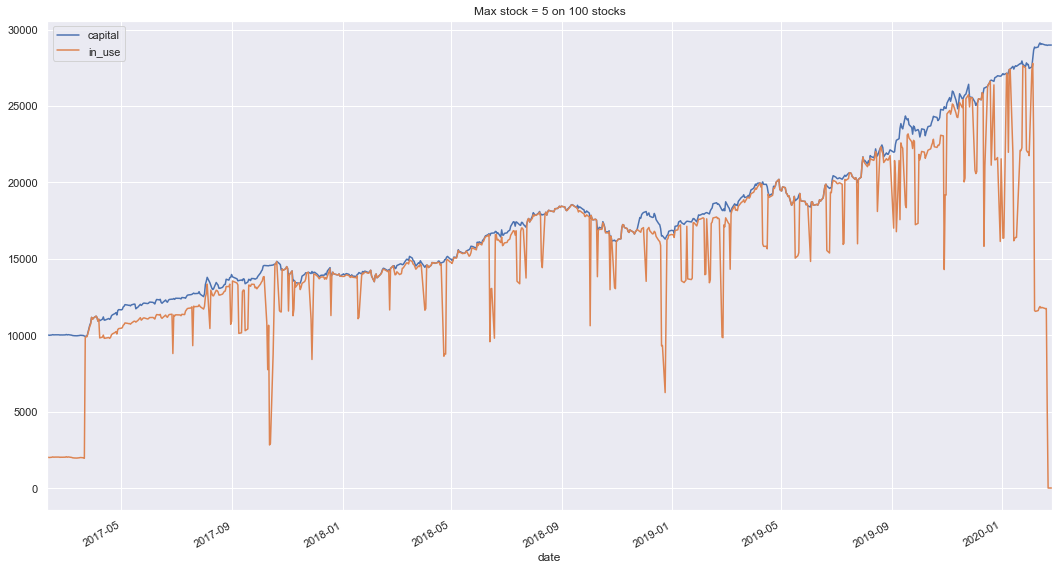

In [7]:
#myPnL_df, my_Capital_df = backtester()
myCapital_df = my_Capital_df
myCapital_df.index = myCapital_df.date
to_plot_cols = ['capital', 'in_use']
myCapital_df[to_plot_cols][first_buy_date:].plot(figsize=(18,10))
plt.title('Max stock = 5 on 100 stocks')
plt.show()

# Analysis of Results

The cells below perform a simple analysis. They look at the completed trades. For each trade it calculates the gain and gain percentage. With that it then displays the top ten losses and top ten gains. It ends with calculating the percentage of trades that resulted in a loss.

In [8]:
sell_df = myPnL_df[myPnL_df.action=='SELL'].copy()
sell_df['gain'] = (sell_df.close_amount - sell_df.orig_amount)
sell_df['gain_pct'] = round((sell_df.gain / sell_df.orig_amount)*100, 2)
sell_df['daily_comp_pct'] = (((1 + sell_df.gain_pct/100) ** (1/ sell_df.days_in_trade)) - 1)*100
sell_df

,action,close_amount,daily_gain,daily_pct,daily_return,date,days_in_trade,invested,no_shares,orig_amount,stop_loss,ticker,gain,gain_pct,daily_comp_pct
0,SELL,1988.418079,0.000000e+00,0.000000e+00,NaN,2017-03-23,2,0,307.338415,1988.418079,5.82282,EPM,0.000000e+00,0.00,0.000000
0,SELL,1984.745763,2.273737e-13,1.145606e-14,NaN,2017-03-23,1,0,68.392342,1984.745763,26.11800,TOWN,2.273737e-13,0.00,0.000000
0,SELL,1985.043996,2.982338e-01,1.502630e-02,NaN,2017-03-24,2,0,29.823377,1984.745763,59.89500,DLX,2.982338e-01,0.02,0.010000
0,SELL,2006.886358,-5.386581e+00,-2.676864e-01,NaN,2017-03-24,3,0,38.475582,1988.418079,46.51200,CPB,1.846828e+01,0.93,0.309044
0,SELL,1961.054528,-1.276966e+01,-6.469501e-01,NaN,2017-03-24,3,0,182.423677,1988.418079,9.81000,FEIM,-2.736355e+01,-1.38,-0.462132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,SELL,5486.724081,-3.074457e+01,-5.572225e-01,NaN,2020-02-05,2,0,118.248364,5517.468655,41.99400,OTEX,-3.074457e+01,-0.56,-0.280393
0,SELL,5503.173637,-6.762122e+01,-1.213852e+00,NaN,2020-02-06,13,0,198.885928,5519.084511,24.97500,TOWN,-1.591087e+01,-0.29,-0.022338
0,SELL,5926.670327,7.574020e+01,1.294498e+00,NaN,2020-02-06,4,0,1893.504897,5491.164201,2.61000,GRPN,4.355061e+02,7.93,1.926132
0,SELL,6460.421528,-2.703038e+01,-4.166563e-01,NaN,2020-02-20,19,0,16.185853,5588.651463,310.75200,REGN,8.717701e+02,15.60,0.765896


In [9]:
sell_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 0
Data columns (total 15 columns):
action            293 non-null object
close_amount      293 non-null float64
daily_gain        293 non-null float64
daily_pct         293 non-null float64
daily_return      0 non-null float64
date              293 non-null datetime64[ns]
days_in_trade     293 non-null int64
invested          293 non-null int64
no_shares         293 non-null float64
orig_amount       293 non-null float64
stop_loss         293 non-null float64
ticker            293 non-null object
gain              293 non-null float64
gain_pct          293 non-null float64
daily_comp_pct    293 non-null float64
dtypes: datetime64[ns](1), float64(10), int64(2), object(2)
memory usage: 36.6+ KB


In [10]:
sell_df.describe()

,close_amount,daily_gain,daily_pct,daily_return,days_in_trade,invested,no_shares,orig_amount,stop_loss,gain,gain_pct,daily_comp_pct
count,293.000000,293.000000,293.000000,0.0,293.000000,293.0,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,3502.878052,-5.638616,-0.231431,NaN,13.010239,0.0,232.545633,3438.085502,44.565671,64.792550,1.981263,0.052907
std,975.239099,97.652237,2.970227,NaN,20.647479,0.0,533.670122,925.522073,46.330726,268.943672,8.356555,1.007246
min,1914.780766,-684.921510,-23.214794,NaN,1.000000,0.0,6.039206,1885.856585,0.477000,-674.613852,-21.150000,-10.792377
25%,2759.645324,-25.645996,-0.754553,NaN,2.000000,0.0,48.334028,2742.820870,14.058000,-25.611925,-0.750000,-0.226290
50%,3343.382326,0.000000,0.000000,NaN,5.000000,0.0,110.759906,3333.311507,27.090000,17.315640,0.470000,0.098965
75%,4023.584220,30.277011,0.922722,NaN,15.000000,0.0,200.271594,3941.809557,59.895000,123.383598,3.730000,0.395152
max,6460.421528,560.674128,14.551084,NaN,172.000000,0.0,6312.873454,5588.651463,330.363000,2143.818606,68.120000,4.836099


In [11]:
sell_df.sort_values(by='gain_pct', ascending=True)[0:10]

,action,close_amount,daily_gain,daily_pct,daily_return,date,days_in_trade,invested,no_shares,orig_amount,stop_loss,ticker,gain,gain_pct,daily_comp_pct
0,SELL,2265.445045,-684.921510,-23.214794,NaN,2017-11-07,4,0,83.936460,2873.145013,30.80700,TRIP,-607.699968,-21.15,-5.767563
0,SELL,2189.942304,-561.817659,-20.416667,NaN,2017-11-02,2,0,286.641663,2751.759963,8.64000,OPCH,-561.817659,-20.42,-10.792377
0,SELL,2338.923294,-371.602476,-13.709609,NaN,2017-09-15,14,0,2310.960669,2732.248800,1.06407,TGA,-393.325506,-14.40,-1.104462
0,SELL,4422.468587,-239.862703,-5.144695,NaN,2019-12-02,9,0,374.785473,5097.082439,12.24000,OPCH,-674.613852,-13.24,-1.565664
0,SELL,3213.250660,-94.468782,-2.856010,NaN,2018-10-02,17,0,131.206642,3648.856711,25.02900,SYX,-435.606051,-11.94,-0.745161
0,SELL,2861.379551,-68.218320,-2.328590,NaN,2018-12-24,41,0,27.070762,3246.325788,107.92800,IQV,-384.946237,-11.86,-0.307438
0,SELL,2954.424776,-107.318849,-3.505155,NaN,2018-07-23,14,0,6312.873454,3345.822930,0.47700,AGRX,-391.398154,-11.70,-0.884848
0,SELL,3497.735650,-64.872995,-1.820941,NaN,2019-06-03,38,0,270.304146,3951.846616,13.15800,PSDO,-454.110965,-11.49,-0.320681
0,SELL,2864.011152,-115.207895,-3.867050,NaN,2018-12-20,19,0,95.213137,3230.581728,30.53700,CVI,-366.570576,-11.35,-0.632068
0,SELL,2589.512818,-179.017767,-6.466165,NaN,2017-10-25,7,0,416.320389,2918.405925,6.30900,MBI,-328.893107,-11.27,-1.693667


In [12]:
sell_df.sort_values(by='gain_pct', ascending=False)[0:10]

,action,close_amount,daily_gain,daily_pct,daily_return,date,days_in_trade,invested,no_shares,orig_amount,stop_loss,ticker,gain,gain_pct,daily_comp_pct
0,SELL,3341.201480,31.483642,0.951249,NaN,2017-04-07,11,0,393.545522,1987.404885,4.545,SYX,1353.796595,68.12,4.836099
0,SELL,5803.603184,94.002517,1.646394,NaN,2019-09-05,128,0,70.151132,3659.784577,46.953,MEDP,2143.818606,58.58,0.360875
0,SELL,4413.817606,560.674128,14.551084,NaN,2018-11-26,30,0,298.230919,3411.761717,10.296,OPCH,1002.055889,29.37,0.862049
0,SELL,4853.142631,-60.362471,-1.228501,NaN,2019-08-21,14,0,603.624705,3863.198114,5.760,PRPL,989.944517,25.62,1.642568
0,SELL,3182.586332,-64.256494,-1.979045,NaN,2017-09-08,36,0,188.989687,2541.911292,12.105,SYX,640.675039,25.20,0.626237
0,SELL,3183.988547,61.818161,1.979974,NaN,2018-03-05,48,0,17.662332,2581.349788,131.535,PANW,602.638760,23.35,0.438156
0,SELL,3997.386933,-18.147444,-0.451931,NaN,2018-08-10,34,0,32.995352,3326.261467,90.729,IQV,671.125466,20.18,0.542112
0,SELL,3534.268772,49.899608,1.432099,NaN,2018-05-21,13,0,172.067613,2978.490382,15.579,VSH,555.778390,18.66,1.324792
0,SELL,5198.694519,-158.425228,-2.957284,NaN,2019-09-27,17,0,586.760104,4418.303581,6.777,SPPI,780.390938,17.66,0.961231
0,SELL,3248.002477,41.508019,1.294498,NaN,2018-02-27,16,0,259.425118,2770.660260,9.612,OPCH,477.342217,17.23,0.998500


In [13]:
sell_df[sell_df.gain_pct < 0].count()[0], sell_df[sell_df.gain_pct < 0].count()[0]/len(sell_df)

(105, 0.3583617747440273)

In [14]:
myPnL_df

,action,close_amount,daily_gain,daily_pct,daily_return,date,days_in_trade,invested,no_shares,orig_amount,stop_loss,ticker
0,BUY,2000.000000,0.000000,0.000000,NaN,2017-02-08,0,0,141.242938,2000.000000,12.744,ORIT
0,CLOSE,2000.000000,0.000000,NaN,0.000000,2017-02-08,1,0,141.242938,2000.000000,12.744,ORIT
0,CLOSE,2007.062147,7.062147,NaN,0.353107,2017-02-09,2,0,141.242938,2000.000000,12.744,ORIT
0,CLOSE,1994.350282,-12.711864,NaN,-0.633357,2017-02-10,3,0,141.242938,2000.000000,12.744,ORIT
0,CLOSE,2012.711864,18.361582,NaN,0.920680,2017-02-13,4,0,141.242938,2000.000000,12.744,ORIT
...,...,...,...,...,...,...,...,...,...,...,...,...
0,CLOSE,5258.638656,-45.114916,NaN,-0.850622,2020-02-19,28,0,110.036381,5239.932471,42.858,CPB
0,CLOSE,6487.451903,51.147297,NaN,0.794669,2020-02-19,18,0,16.185853,5588.651463,310.752,REGN
0,SELL,6460.421528,-27.030375,-0.416656,NaN,2020-02-20,19,0,16.185853,5588.651463,310.752,REGN
0,CLOSE,5253.136837,-5.501819,NaN,-0.104624,2020-02-20,29,0,110.036381,5239.932471,42.858,CPB


In [15]:
sell_df.ticker.unique(), len(sell_df.ticker.unique())

(array(['EPM', 'TOWN', 'DLX', 'CPB', 'FEIM', 'GRIF', 'VZ', 'JVA', 'GS',
        'SYX', 'MBI', 'AMWD', 'REGN', 'CVI', 'MDP', 'BLDR', 'OPCH', 'PEBK',
        'SPPI', 'VSH', 'AMT', 'HWC', 'CRL', 'TRNS', 'OTEX', 'VIVO', 'FCFS',
        'DRI', 'GWB', 'TGA', 'PGR', 'BXP', 'ORIT', 'DSGX', 'PCAR', 'GRPN',
        'TRIP', 'SLG', 'FHB', 'MRC', 'USPH', 'IPG', 'BOCH', 'PANW', 'CVX',
        'ORC', 'IQV', 'HLT', 'EXLS', 'AGRX', 'BMCH', 'LIND', 'AA', 'DRQ',
        'PRPL', 'DERM', 'PSDO', 'MEDP', 'FOR', 'TXRH'], dtype=object), 60)

In [16]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=False)[0:10]

,ticker,gain
50,SYX,2944.916641
35,MEDP,2143.818606
45,PRPL,1259.603592
54,TRNS,1139.654429
5,BMCH,1133.205679
49,SPPI,1080.909579
9,CRL,962.241095
47,REGN,910.300196
41,PANW,874.856135
14,DRI,853.470819


In [17]:
sell_df[['ticker', 'gain']].groupby(by='ticker').sum().reset_index().sort_values(by='gain', ascending=True)[0:10]

,ticker,gain
51,TGA,-608.930891
1,AGRX,-577.881252
53,TRIP,-537.878030
33,MBI,-461.706838
46,PSDO,-454.110965
43,PEBK,-249.718200
19,FCFS,-204.740101
0,AA,-158.202256
57,VIVO,-123.584995
29,IPG,-103.779088


In [18]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=False)[0:10]

,ticker,gain
35,MEDP,2143.818606
47,REGN,455.150098
50,SYX,294.491664
24,GRPN,271.204474
45,PRPL,251.920718
32,LIND,226.949956
41,PANW,218.714034
38,ORC,201.512089
22,FOR,188.830264
39,ORIT,166.638144


In [19]:
sell_df[['ticker', 'gain']].groupby(by='ticker').mean().reset_index().sort_values(by='gain', ascending=True)[0:10]

,ticker,gain
46,PSDO,-454.110965
1,AGRX,-288.940626
51,TGA,-202.976964
0,AA,-79.101128
53,TRIP,-76.839719
12,DERM,-73.223204
19,FCFS,-68.246700
33,MBI,-65.958120
43,PEBK,-41.619700
57,VIVO,-41.194998


In [20]:
myCapital_df.tail()

,date,capital,in_use,free
date,,,,
2020-02-19,2020-02-19,28992.5,11746.1,17246.5
2020-02-20,2020-02-20,28960,5253.14,23706.9
2020-02-21,2020-02-21,28984.2,0,28984.2
2020-02-24,2020-02-24,28984.2,0,28984.2
2020-02-25,2020-02-25,28984.2,0,28984.2


In [21]:
len(possible_trades_df)

919

# Save The DataFrames

In [22]:
possible_trades_df.to_csv(f'{DATAPATH}possible_trades_0100.csv', index=False)
myCapital_df.to_csv(f'{DATAPATH}capital_0100.csv', index=False)
myPnL_df.to_csv(f'{DATAPATH}PnL_0100.csv', index=False)

In [23]:
!ls ../data

F13_Renaissance_tech.csv capital_0500.csv         possible_trades_1000.csv
F13_Renaissance_tech.txt capital_1000.csv         possible_trades_1500.csv
PnL_0100.csv             capital_1500.csv         possible_trades_2000.csv
PnL_0500.csv             capital_2000.csv         stocks.csv
PnL_1000.csv             exclude.csv              stocks_100.csv
PnL_1500.csv             optimal_params.csv       stocks_1000.csv
PnL_2000.csv             possible_trades_0100.csv stocks_2000.csv
capital_0100.csv         possible_trades_0500.csv stocks_500.csv
